c:\python3.6\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
c:\python3.6\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


Accuracy is: 0.9680065627563577


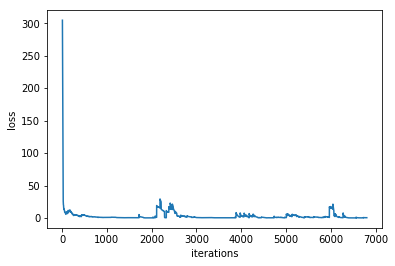

In [211]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn import linear_model


f1 = open('train_data.json', 'r')
f2 = open('labels.json', 'r')
X = json.load(f1)
Y = json.load(f2)
split_index = int(np.around(len(X) * 0.85))

X_train = X[0 : split_index]
X_test = X[split_index:]
Y_train = Y[0 : split_index]
Y_test = Y[split_index:]


def LR_train(X_train, Y_train, N, step_size, minibatch_size, iterations):
    '''
       X_train : data for train
       Y_train : labels for train
       N: number of the dimension of X
       minibatch_size : size of minibatch 
       iterations; train steps
    '''
    
    # initialize weight vector
    weights = np.ones((N+1, 1))
    # record loss：- likelihood
    hist_loss = []
    
    for step in range(iterations):
        # get minibatch
        X_train_mini = np.array(X_train[step : step + minibatch_size])
        X_train_mini = np.c_[X_train_mini, np.ones(minibatch_size)]
        Y_train_mini = np.array(Y_train[step: step + minibatch_size]).reshape((-1,1))
        
        # sigmoid
        p = 1 / (1 + np.exp(- np.dot(X_train_mini, weights)))
        # record loss
        loss =  - np.sum(Y_train_mini * np.log(p) + (1 - Y_train_mini) * np.log(1 - p))
        hist_loss.append(loss)
        
        # calculate gradient
        Xt = np.transpose(X_train_mini)
        gradient =  (np.dot(Xt, (Y_train_mini - p)))/ minibatch_size
        weights = weights + step_size * gradient
    
    # figure loss
    figure = plt.figure()
    plt.plot([k for k in range(len(hist_loss))], hist_loss)
    plt.xlabel("iterations")
    plt.ylabel("loss")
        
    return weights

def LR_predict(Test_X, Test_Y, weights):
    Test_X = np.c_[np.array(Test_X), np.ones(len(Test_X))]
    p = 1 / (1 + np.exp(- np.dot(Test_X, weights)))
    y = []
    p = list(p)
    for i in p:
        if i[0] < 0.5:
            y.append(0)
        if i[0] > 0.5:
            y.append(1)
    count = 0
    for i in range(len(y)):
        if y[i] == Test_Y[i]:
            count += 1
    acc = count/ len(Test_Y)
    return acc
    

weights = LR_train(X_train, Y_train, 22, 0.2, 100, len(X_train) - 100)
acc = LR_predict(X_test, Y_test, weights)

print("Accuracy is: {}".format(acc))